# Q2

## a)

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv(r"E:\UNIVERSITY\Machine-Learning\HomeWork\HW2\Practical\data\cats.csv")

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

X = df[['Bwt', 'Hwt']]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

NameError: name 'pwd' is not defined

## b)

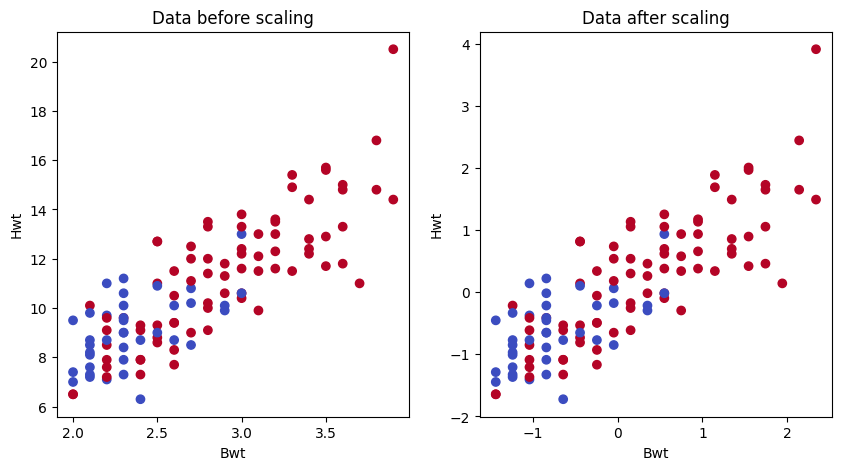

In [74]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train['Bwt'], X_train['Hwt'], c=y_train, cmap='coolwarm')
plt.xlabel('Bwt')
plt.ylabel('Hwt')
plt.title('Data before scaling')

plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('Bwt')
plt.ylabel('Hwt')
plt.title('Data after scaling')

plt.show()

<p style="direction: rtl;" >
مشاهدات: با نگاه به نمودارها، میتوان مشاهده کرد که داده‌ها قبل از نرمال سازی در بازه‌های مختلفی قرار دارند. برای مثال، مقادیر Bwt بین 2 تا 3.9 و مقادیر Hwt بین 6.3 تا 20.5 متغیر هستند. این باعث می‌شود که برخی از ویژگی‌ها تاثیر بیشتری بر روی مدل داشته باشند. با انجام نرمال سازی، داده‌ها به گونه‌ای تغییر می‌کنند که میانگین آن‌ها صفر و انحراف معیار آن‌ها یک شود. این باعث می‌شود که داده‌ها در یک بازه مشابه قرار بگیرند و هر ویژگی به اندازه مناسبی بر روی مدل تاثیر بگذارد.
    </p>

## c)

In [75]:
import numpy as np

C = np.logspace(-2, 5, 8)

Gamma = np.logspace(-6, 1, 16)

## d)

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='linear')

param_grid = {'C': C, 'gamma': Gamma}

grid = GridSearchCV(svc, param_grid, cv=5)

grid.fit(X_train_scaled, y_train)

print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)


Best parameters: {'C': 1.0, 'gamma': 1e-06}
Best score: 0.7652173913043477


## e)

In [77]:
svc = SVC(kernel='rbf')

param_grid = {'C': C, 'gamma': Gamma}

grid_rbf = GridSearchCV(svc, param_grid, cv=5)

grid_rbf.fit(X_train_scaled, y_train)

print('Best parameters:', grid_rbf.best_params_)
print('Best score:', grid_rbf.best_score_)


Best parameters: {'C': 10.0, 'gamma': 0.3981071705534969}
Best score: 0.8


<p style="direction: rtl;" >

مشاهدات: با مقایسه دقت دو مدل بر روی داده‌های آموزشی، می‌توان مشاهده کرد که مدل با کرنل گوسی عملکرد بهتری دارد. دلیل این امر این است که داده‌ها به صورت خمیده در فضای دو بعدی قرار دارند و مدل خطی نمی‌تواند آن‌ها را به خوبی جدا کند. اما مدل با کرنل گوسی می‌تواند با ایجاد یک فضای ویژگی با بعد بالاتر، داده‌ها را به صورت خطی جدا کند.


</p>

## f)

In [78]:
from sklearn.metrics import accuracy_score

y_pred = grid_rbf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy on test data (rbf):', accuracy)




Accuracy on test data (rbf): 0.8275862068965517
